# Gaussian Mixture Models

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

This notebook:

- Generates the plots used in the lecture
- Shows how to draw samples from a GMM
- Shows how to use scikit-learn's GMM


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
sns.set_style('white')

## Sampling from a normal distribution

Using [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). You can also sample from a standard normal and multiply by the inverse square root of the covariance matrix and add the mean to get samples.

In [ ]:
from scipy.stats import multivariate_normal

In [ ]:
# Setup a 2D grid of points to evaluate the Normal PDF
xs = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(xs, xs)

In [ ]:
# Evaluate a 2D Gaussian PDF on a grid
mean = [0,0]
covar = [[2, 0.8],[0.8, 0.5]]
Z = multivariate_normal.pdf(np.c_[X.ravel(), Y.ravel()], mean, covar)
Z = Z.reshape(X.shape)

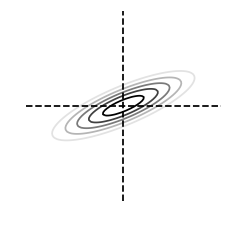

In [ ]:
# Draw a contout plot
figure(figsize=(3.5,3.5))
contour(X, Y, Z)
axis('off')
axhline(c='black', ls='dashed')
axvline(c='black', ls='dashed')

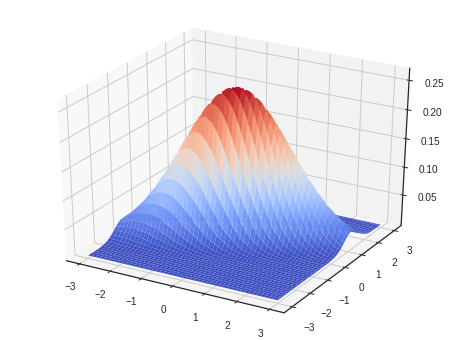

In [ ]:
# Draw a 3D plot
fig = figure(figsize=(8,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.25, cmap=cm.coolwarm)

In [ ]:
# Use rvs to sample
samples = multivariate_normal.rvs(mean=mean, cov=covar, size=20)
print(samples)

[[ 0.09922077  0.46271044]
 [ 2.10887715  0.44903678]
 [ 1.24432936  0.7474585 ]
 [-0.66535578 -0.65644143]
 [-2.7208027  -0.80886959]
 [ 0.46620931  0.29715365]
 [-0.20791288 -0.72334684]
 [-0.22914038 -0.27694633]
 [-1.67033719 -0.12363722]
 [ 3.05378543  0.70912371]
 [ 0.48935989 -0.21095054]
 [ 0.16643184  0.51224006]
 [-0.03868116  0.34587119]
 [-0.45829108 -0.49595714]
 [ 2.10627019  0.8608881 ]
 [-2.08447975 -0.80264388]
 [-0.73707529 -0.32627008]
 [-0.99279471 -0.31685803]
 [ 1.09388739  0.68315153]
 [ 1.06882569 -0.08395491]]


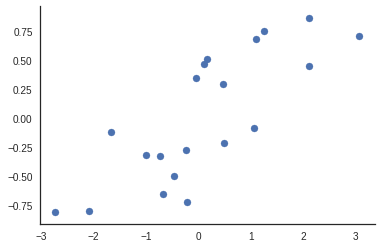

In [ ]:
scatter(samples[:,0], samples[:,1])
sns.despine()

## Sampling from a GMM

The following code shows how to generate samples from a Gaussian mixture and evaluate the probability of samples

In [ ]:
def gmm_sample(n, weights, means, covars):
    """
    Generate n samples from a Gaussian mixture with given weights,
    means, and covariance matrix.
    """
    
    # normalize the weights to sum to unity
    weights = weights / np.sum(weights)
    
    # Sample from a multinomial distribution to say which Gaussian to use
    counts = np.random.multinomial(n, weights)
    
    # Sample from the appropriate Gaussian
    results = []
    for n, m, c in zip(counts, means, covars):
        samples = multivariate_normal.rvs(mean=m, cov=c, size=n)
        results.extend(samples)
    results = np.array(results)
    
    # Shuffle samples
    np.random.shuffle(results)
    return results

def gmm_prob(X, weights, means, covars):
    """
    Evaluate probabilities of observations under Gaussian mixture model.
    """
    prob = np.zeros(X.shape[0])
    for w, m, c in zip(weights, means, covars):
        prob += w * multivariate_normal.pdf(X, mean=m, cov=c)
    return prob
        

Sample from a 3 component GMM

In [ ]:
random.seed(11)
mu = [
    [-2, 2],
    [3, 4],
    [1, 8]
]
covars = [np.eye(2), np.eye(2)*0.5, [[1,0.8],[0.8,0.9]]]
w = [0.5, 0.2, 0.3]
X = gmm_sample(1000, w, mu, covars)

Plot samples

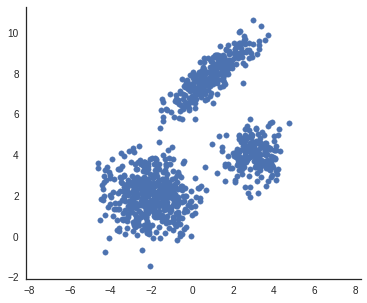

In [ ]:
figure(figsize=(6,5))
scatter(X[:,0], X[:,1], s=30)
axis('equal')
sns.despine()

Evaluate probability under the GMM on a grid (for visualization)

In [ ]:
xs = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
ys = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
XX, YY = np.meshgrid(xs, ys)
Z = gmm_prob(np.c_[XX.ravel(), YY.ravel()], w, mu, covars).reshape(XX.shape)

Plot samples and a contour plot of probability density

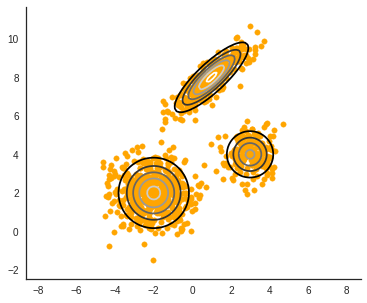

In [ ]:
figure(figsize=(6,5))
scatter(X[:,0], X[:,1], color='orange', s=30)
contour(XX, YY, Z, cmap=cm.gray)
axis('equal')
sns.despine()

Let's look at what happens when the component Normal distributions overlap more

In [ ]:
# Setup means and covariances that we will sample from
mu = [
    [0, 1],
    [1, 6],
    [2, 4]
]
covars = [np.eye(2), np.eye(2)*0.5, [[1,0.8],[0.8,0.9]]]
w = [0.3333, 0.33333, 0.33333]

# sample
X = gmm_sample(300, w, mu, covars)

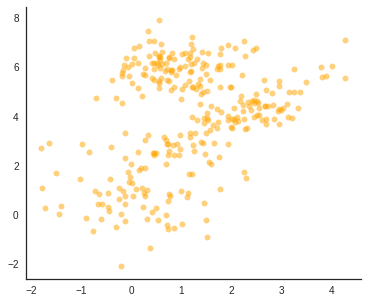

In [ ]:
figure(figsize=(6,5))
scatter(X[:,0], X[:,1], alpha=0.5, color='orange', s=30)
sns.despine()

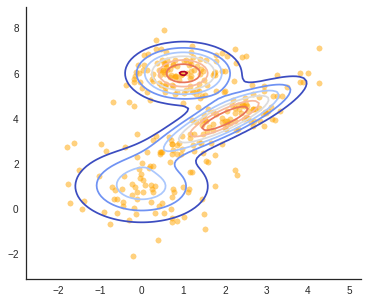

In [ ]:
xs = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
ys = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
XX, YY = np.meshgrid(xs, ys)
Z = gmm_prob(np.c_[XX.ravel(), YY.ravel()], w, mu, covars).reshape(XX.shape)
figure(figsize=(6,5))
scatter(X[:,0], X[:,1], alpha=0.5, color='orange', s=30)
contour(XX, YY, Z, cmap=cm.coolwarm)
sns.despine()

## Using sklearn's GMM implementation

Instead of implementing our own version of EM, we can use the GaussianMixture object provided by the scikit learn library.

In [ ]:
from sklearn.mixture import GaussianMixture

Fit a 3 component GMM using the EM algorithm

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Label the data according to the components it is most likely to have been generated from

In [ ]:
 y_pred = gmm.predict(X)

Plot the results and color by label

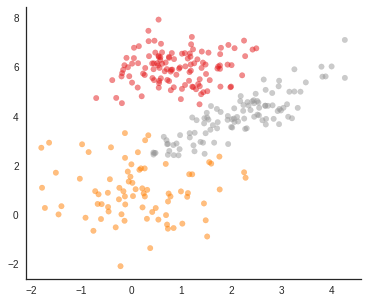

In [ ]:
figure(figsize=(6,5))
scatter(X[:,0], X[:,1], alpha=0.5, c=y_pred, s=30, cmap=cm.Set1)
sns.despine()

You can also ask sklearn for the posterior probability of each observation under each component Gaussian distribution.

In [ ]:
# Predict probability of each component
gmm.predict_proba(X)

array([[1.53613343e-06, 3.86578253e-01, 6.13420211e-01],
       [2.85437254e-13, 9.99851283e-01, 1.48717051e-04],
       [9.99812515e-01, 1.87485090e-04, 5.38663389e-11],
       [2.40727481e-04, 1.32006670e-03, 9.98439206e-01],
       [1.33680318e-03, 2.12138572e-03, 9.96541811e-01],
       [9.99921225e-01, 7.87754149e-05, 4.24852290e-12],
       [9.98564547e-01, 1.43545301e-03, 1.24539288e-12],
       [4.71136642e-14, 9.99957256e-01, 4.27443977e-05],
       [4.24443360e-19, 9.99999740e-01, 2.60469749e-07],
       [9.99844483e-01, 3.65910183e-05, 1.18926421e-04],
       [5.29735482e-14, 9.94374880e-01, 5.62512008e-03],
       [2.18642047e-13, 9.84324930e-01, 1.56750701e-02],
       [5.37189783e-04, 1.14621684e-03, 9.98316593e-01],
       [1.75494634e-12, 9.85236160e-01, 1.47638401e-02],
       [9.99734652e-01, 2.65313667e-04, 3.40020467e-08],
       [9.99947963e-01, 5.20372222e-05, 4.44354905e-14],
       [1.37225656e-02, 4.35944638e-03, 9.81917988e-01],
       [1.20481221e-03, 1.36110

`score_samples()` can be used to get the log probability of data under the fit model. This could, for example, be used for outlier/anomoly detection.



In [ ]:
# Gives the log probabilities of the data under the GMM
scores = gmm.score_samples(X)

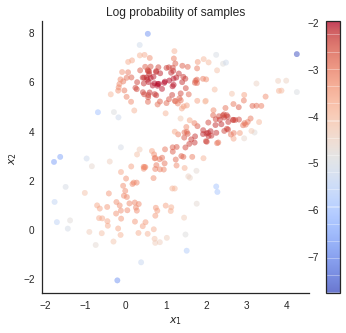

In [ ]:
figure(figsize=(6,5))
scatter(X[:,0], X[:,1], alpha=0.5, s=30, c=scores, cmap=cm.coolwarm)
colorbar()
title('Log probability of samples')
sns.despine()
xlabel('$x_1$')
ylabel('$x_2$')
show()

`score_samples()` can also be used to plot a contour map of the fit mixture model PDF.

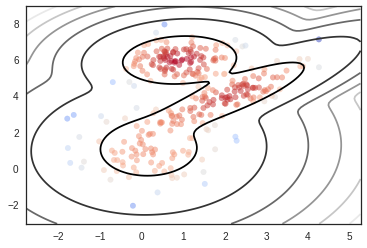

In [ ]:
xs = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
ys = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
XX, YY = np.meshgrid(xs, ys)
ZZ = gmm.score_samples(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
scatter(X[:,0], X[:,1], alpha=0.5, s=30, c=scores, cmap=cm.coolwarm)
contour(XX, YY, ZZ)